## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy as sp

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results , on="Mouse ID", how = "left")
mouse_study_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Aside: Get a description of the combined dataset. 
mouse_study_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#tumor volume for each regimen
mice = mouse_study_data["Mouse ID"].unique()
drugs = mouse_study_data["Drug Regimen"].unique()
time = mouse_study_data["Timepoint"].unique()

num_mouse = len(mice)
num_drugs = len(drugs)
num_measurements = len(time)
num_samples = num_drugs * num_measurements

data_summary = pd.DataFrame({"Number of Mice": [num_mouse],
                         "Number of Drug Regimen Treatments": [num_drugs],
                         "Number of Time Measurements": [num_measurements],
                         "Number of Samples": [num_samples]})
data_summary

,Number of Mice,Number of Drug Regimen Treatments,Number of Time Measurements,Number of Samples
0,249,10,10,100


In [4]:
#group by statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for regimen
drug_group_stats = mouse_study_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_group_stats



/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [5]:
stat_analysis= pd.DataFrame(round(mouse_study_data.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)'],2))

stat_analysis


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,161.0,52.32,6.51,45.00,47.08,50.85,56.18,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar plots

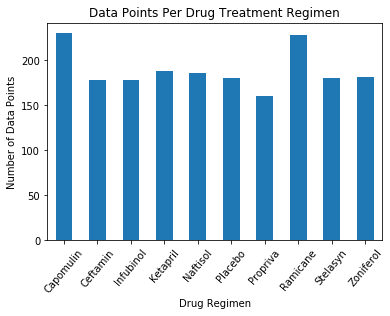

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_reg = mouse_study_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
forpanbar = pd.DataFrame(treatment_reg)
#newtry = forpanbar.reset_index()
#newtry

also = forpanbar.plot.bar(legend=False,rot=50)
also
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.savefig('barplot1')

In [7]:
forpanbar.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


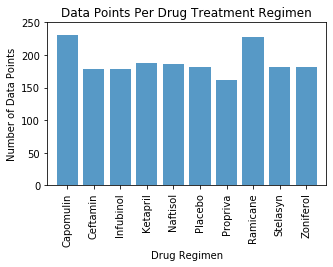

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(treatment_reg))

tick_locations = [x for x in x_axis]
#for x in x_axis:
#tick_locations.append(x)

plt.figure(figsize=(5,3))
#plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

newtry = forpanbar.reset_index()
newtry

plt.bar(x_axis, forpanbar['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, newtry['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(treatment_reg)-.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig('barplot2')
plt.show()



In [9]:
#treatment_reg = mouse_study_data.groupby('Drug Regimen').count()

gender_count = mouse_study_data.groupby("Sex").count()

#gender_count = mouse_study_data["Sex"].value_count()
gender_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


In [10]:
labels = [mouse_study_data['Sex'].unique()]
newlist = list(gender_count.index)
newlist

['Female', 'Male']

In [11]:
sizes = [gender_count["Mouse ID"]]
sizes

[Sex
 Female    935
 Male      958
 Name: Mouse ID, dtype: int64]

## Pie plots

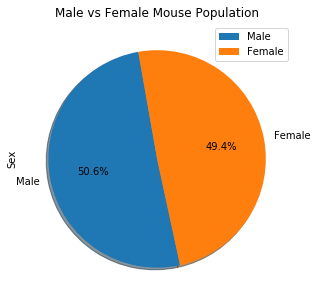

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count', figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=100)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('piechart1')
plt.show()


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


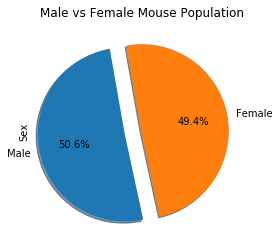

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = pd.DataFrame(mouse_study_data["Sex"].value_counts())
labels = ["Male", "Female"]
explode = (0.2,0)
plt.pie(gender_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('piechart2')
plt.show()

## Quartiles, outliers and boxplots

In [14]:
# First create a subset of the combined_data dataframe where 'Drug Regimen' is
# in [Capomulin, Ramicane, Infubinol, and Ceftamin]

# Create a list of the four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
four_drugs = mouse_study_data[mouse_study_data['Drug Regimen'].isin(four_drug_list)]

# View the newly created subset dataframe
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
cap_df = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == "Capomulin",:]
ram_df = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == "Ramicane", :]
inf_df = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == "Infubinol", :]
ceft_df = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [16]:
caplast = cap_df.groupby('Mouse ID')['Timepoint'].max()
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, mouse_study_data, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Quantitatively determine capomulin outliers
# treatments - Capomulin, Ramicane, Infubinol, and Ceftamin

tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")


Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [18]:
ramlast = ram_df.groupby('Mouse ID')['Timepoint'].max()
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, mouse_study_data, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [19]:
#Ramicane
tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [20]:
inflast = inf_df.groupby('Mouse ID')['Timepoint'].max()
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, mouse_study_data, on=("Mouse ID","Timepoint"),how="left")
inflastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [21]:
#Infubinol
tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [22]:
ceftlast = ceft_df.groupby('Mouse ID')['Timepoint'].max()
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, mouse_study_data, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [23]:
#Ceftamin
tumors4 = ceftlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


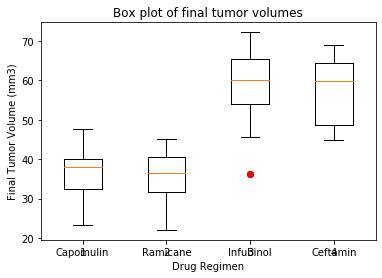

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_list = [tumors, tumors2, tumors3, tumors4]
red_circle = dict(markerfacecolor='r', marker='o', markeredgecolor = 'r')

fig1, ax = plt.subplots()
ax.set_title('Box plot of final tumor volumes')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')

ax.boxplot(data_list, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.boxplot(data_list, flierprops=red_circle);

plt.savefig('boxplot')
plt.show()


## Line and scatter plots

In [25]:
line_df = cap_df.loc[cap_df["Mouse ID"] == "l509"]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


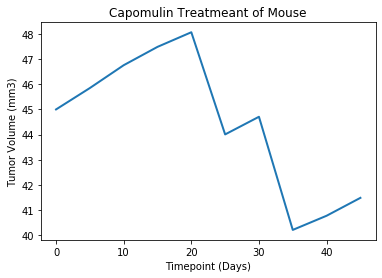

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axisTP = line_df["Timepoint"]
tumorsize = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin Treatmeant of Mouse')
plt.plot(x_axisTP, tumorsize, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

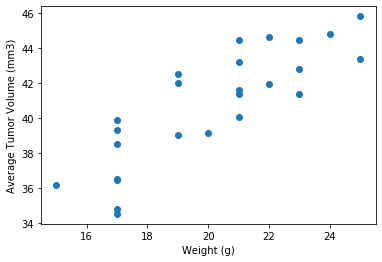

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

The r-squared is: 0.8419363424694718
The equation of the regression line is: y = 0.95x + 21.55


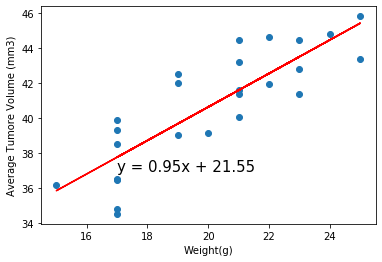

Value of R^2 = 0.709


In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = capavg['Weight (g)']
y_values = capavg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig('linearregression')
plt.show()
print(f'Value of R^2 = {round(rvalue*rvalue,3)}')